📌 Number of Users: 610
📌 Number of Movies: 9724
📌 Total Ratings: 100836
📌 Avg Ratings per User: 165.30
📌 Avg Ratings per Movie: 10.37


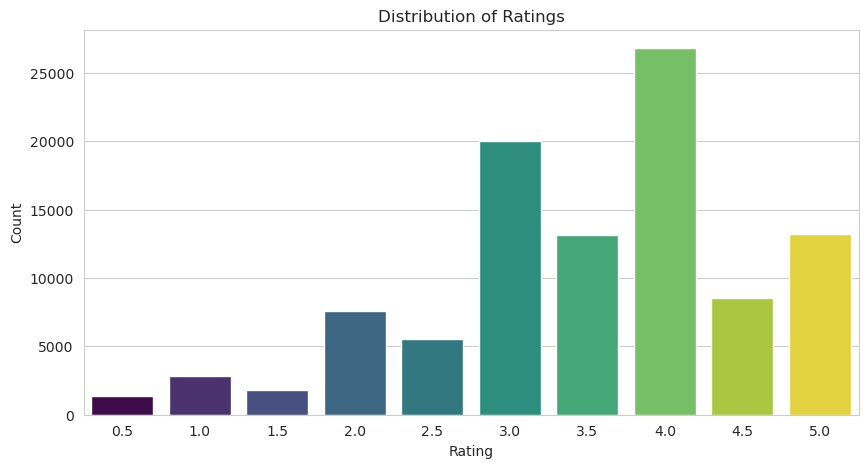

🔹 Rating Distribution:
        Count  Percentage
rating                   
0.5      1370    1.358642
1.0      2811    2.787695
1.5      1791    1.776151
2.0      7551    7.488397
2.5      5550    5.503987
3.0     20047   19.880797
3.5     13136   13.027093
4.0     26818   26.595660
4.5      8551    8.480106
5.0     13211   13.101472


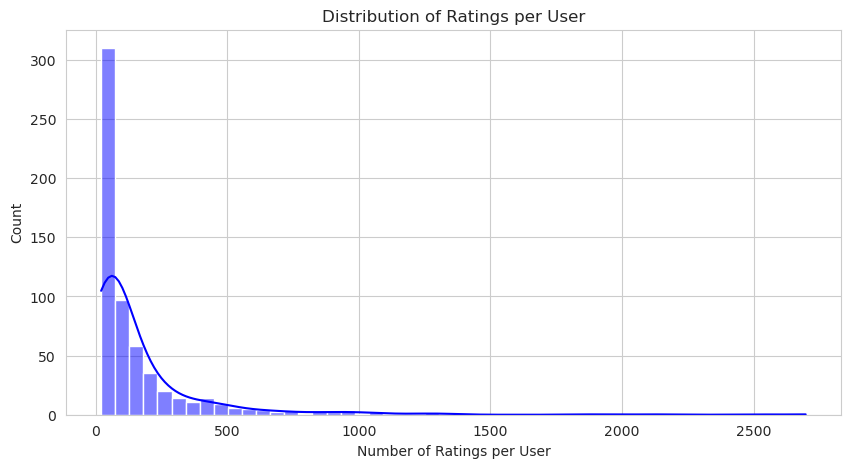

🔹 User Rating Statistics:
count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
dtype: float64


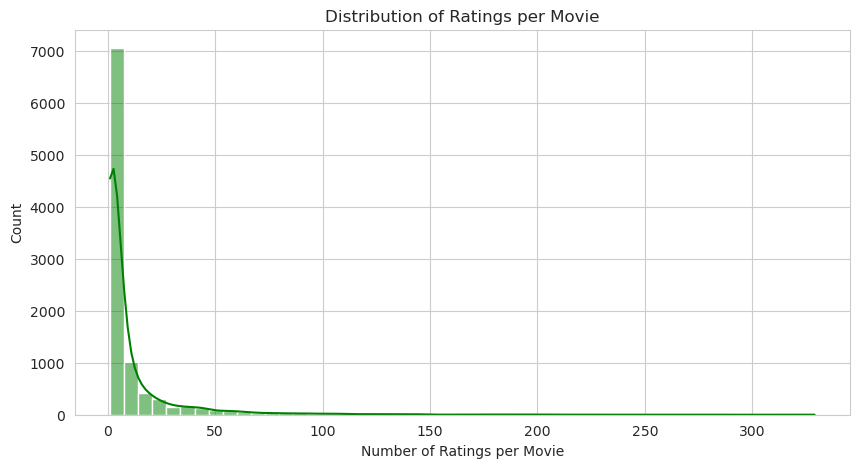

🔹 Movie Rating Statistics:
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
dtype: float64
📌 Sparsity of the Rating Matrix: 0.983000
🔹 Top 10 Most Rated Movies:
      movieId                                      title  \
97        110                          Braveheart (1995)   
224       260  Star Wars: Episode IV - A New Hope (1977)   
257       296                        Pulp Fiction (1994)   
277       318           Shawshank Redemption, The (1994)   
314       356                        Forrest Gump (1994)   
418       480                       Jurassic Park (1993)   
461       527                    Schindler's List (1993)   
507       589          Terminator 2: Judgment Day (1991)   
510       593           Silence of the Lambs, The (1991)   
1939     2571                         Matrix, The (1999)   

                                genres  
97                

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("whitegrid")

# Load MovieLens dataset (Modify path if needed)
ratings_path = "ml-latest-small/ratings.csv"
movies_path = "ml-latest-small/movies.csv"

# Load data
ratings_df = pd.read_csv(ratings_path)
movies_df = pd.read_csv(movies_path)

# Merge ratings with movies data
data = pd.merge(ratings_df, movies_df, on="movieId")

# -------------------------------
# 1️⃣ Basic Statistics
# -------------------------------
num_users = ratings_df["userId"].nunique()
num_movies = ratings_df["movieId"].nunique()
num_ratings = len(ratings_df)
avg_ratings_per_user = num_ratings / num_users
avg_ratings_per_movie = num_ratings / num_movies

print(f"📌 Number of Users: {num_users}")
print(f"📌 Number of Movies: {num_movies}")
print(f"📌 Total Ratings: {num_ratings}")
print(f"📌 Avg Ratings per User: {avg_ratings_per_user:.2f}")
print(f"📌 Avg Ratings per Movie: {avg_ratings_per_movie:.2f}")

# -------------------------------
# 2️⃣ Distribution of Ratings (Fixed Warning)
# -------------------------------
plt.figure(figsize=(10, 5))
sns.countplot(x="rating", data=ratings_df, hue="rating", palette="viridis", legend=False)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.xticks(rotation=0)
plt.show()

# Print rating statistics
rating_counts = ratings_df["rating"].value_counts().sort_index()
rating_percentage = (rating_counts / num_ratings) * 100
rating_stats = pd.DataFrame({"Count": rating_counts, "Percentage": rating_percentage})
print("🔹 Rating Distribution:")
print(rating_stats)

# -------------------------------
# 3️⃣ Ratings per User
# -------------------------------
ratings_per_user = ratings_df.groupby("userId").size()

plt.figure(figsize=(10, 5))
sns.histplot(ratings_per_user, bins=50, kde=True, color="blue")
plt.xlabel("Number of Ratings per User")
plt.ylabel("Count")
plt.title("Distribution of Ratings per User")
plt.show()

print("🔹 User Rating Statistics:")
print(ratings_per_user.describe())

# -------------------------------
# 4️⃣ Ratings per Movie
# -------------------------------
ratings_per_movie = ratings_df.groupby("movieId").size()

plt.figure(figsize=(10, 5))
sns.histplot(ratings_per_movie, bins=50, kde=True, color="green")
plt.xlabel("Number of Ratings per Movie")
plt.ylabel("Count")
plt.title("Distribution of Ratings per Movie")
plt.show()

print("🔹 Movie Rating Statistics:")
print(ratings_per_movie.describe())

# -------------------------------
# 5️⃣ Sparsity of the Rating Matrix
# -------------------------------
sparsity = 1 - (num_ratings / (num_users * num_movies))
print(f"📌 Sparsity of the Rating Matrix: {sparsity:.6f}")

# -------------------------------
# 6️⃣ Most and Least Rated Movies
# -------------------------------
top_rated_movies = ratings_per_movie.sort_values(ascending=False).head(10)
least_rated_movies = ratings_per_movie.sort_values(ascending=True).head(10)

print("🔹 Top 10 Most Rated Movies:")
print(movies_df[movies_df["movieId"].isin(top_rated_movies.index)])

print("🔹 Top 10 Least Rated Movies:")
print(movies_df[movies_df["movieId"].isin(least_rated_movies.index)])
